In [1]:
from dotenv import load_dotenv   #for python-dotenv method
load_dotenv()                    

import os 

consumer_key = os.environ.get('CONSUMER_KEY')
consumer_secret = os.environ.get('CONSUMER_SECRET')
access_token = os.environ.get('ACCESS_TOKEN')
access_token_secret = os.environ.get('ACCESS_TOKEN_SECRET')
bearer_token = os.environ.get('BEARER_TOKEN')

In [3]:
import tweepy


In [22]:
# https://pythonbasics.org/flask-rest-api/

In [5]:
#import requests
import requests

# Use tweepy.Client()
client = tweepy.Client( bearer_token=bearer_token, 
                        consumer_key=consumer_key, 
                        consumer_secret=consumer_secret, 
                        access_token=access_token, 
                        access_token_secret=access_token_secret, 
                        return_type = requests.Response,
                        wait_on_rate_limit=True)

In [6]:
# Define query
query = '#100daysofcode (pandas OR python) -is:retweet'

# get max. 100 tweets
tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id','created_at','lang'],
                                     max_results=100)

In [7]:
tweets

<Response [200]>

In [9]:
tweets.status_code

200

In [12]:
tweets.text[:50]

'{"data":[{"author_id":"1237043080957739008","lang"'

In [13]:
import pandas as pd

# Save data as dictionary
tweets_dict = tweets.json() 

# Extract "data" value from dictionary
tweets_data = tweets_dict['data'] 

# Transform to pandas Dataframe
df = pd.json_normalize(tweets_data) 

In [14]:
df.head(6)

,author_id,lang,text,created_at,id
0,1237043080957739008,en,"Did touches to a few tasks today, but for most...",2022-06-17T22:05:41.000Z,1537919437747105797
1,822467311361818625,en,"HEY DEVS, TAKE THIS SURVEY &amp; WIN A MACBOO...",2022-06-17T22:05:19.000Z,1537919345627500546
2,822467311361818625,en,"HEY DEVS, TAKE THIS SURVEY &amp; WIN A MACBOO...",2022-06-17T22:04:35.000Z,1537919159253708800
3,1525520317774548992,en,Pay us to do or write your \n#Assignments \n#c...,2022-06-17T22:04:28.000Z,1537919129021140993
4,822467311361818625,en,"HEY DEVS, TAKE THIS SURVEY &amp; WIN A MACBOO...",2022-06-17T22:04:09.000Z,1537919050864463872
5,822467311361818625,en,"HEY DEVS, TAKE THIS SURVEY &amp; WIN A MACBOO...",2022-06-17T22:03:39.000Z,1537918926809509893


In [15]:
df.to_csv("coding-tweets.csv")


In [16]:
#import re
import re

#define your function here
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [17]:
# Initialize list to store tweet counts
[pandas, python] = [0, 0]

# Iterate through df, counting the number of tweets in which each(pandas and python) is mentioned.
for index, row in df.iterrows():
    pandas += word_in_text('pandas', row['text'])
    python += word_in_text('python', row['text'])

C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


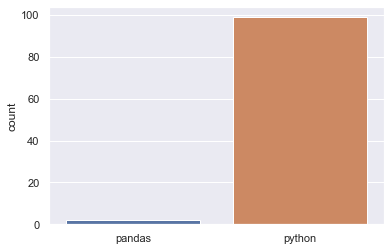

In [21]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['pandas', 'python']

# Plot the bar chart
ax = sns.barplot(cd, [pandas, python])
ax.set(ylabel="count")
plt.show()
